In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [2]:
#reading the data
data = pd.read_csv("ANZ.csv")

In [3]:
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,8/1/2018,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,8/1/2018,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,8/1/2018,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,8/1/2018,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,8/1/2018,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             12043 non-null  object 
 1   card_present_flag  7717 non-null   float64
 2   bpay_biller_code   885 non-null    object 
 3   account            12043 non-null  object 
 4   currency           12043 non-null  object 
 5   long_lat           12043 non-null  object 
 6   txn_description    12043 non-null  object 
 7   merchant_id        7717 non-null   object 
 8   merchant_code      883 non-null    float64
 9   first_name         12043 non-null  object 
 10  balance            12043 non-null  float64
 11  date               12043 non-null  object 
 12  gender             12043 non-null  object 
 13  age                12043 non-null  int64  
 14  merchant_suburb    7717 non-null   object 
 15  merchant_state     7717 non-null   object 
 16  extraction         120

In [5]:
#the columns in data
data.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [6]:
#selecting the necessary columns, with numerical data
data=data[["customer_id","age","txn_description","balance","amount"]]

In [7]:
data.head()

,customer_id,age,txn_description,balance,amount
0,CUS-2487424745,26,POS,35.39,16.25
1,CUS-2487424745,26,SALES-POS,21.20,14.19
2,CUS-2142601169,38,POS,5.71,6.42
3,CUS-1614226872,40,SALES-POS,2117.22,40.90
4,CUS-2487424745,26,SALES-POS,17.95,3.25


In [8]:
#Getting the unique values for the types of transactions
print(data['txn_description'].unique())

['POS' 'SALES-POS' 'PAYMENT' 'INTER BANK' 'PAY/SALARY' 'PHONE BANK']


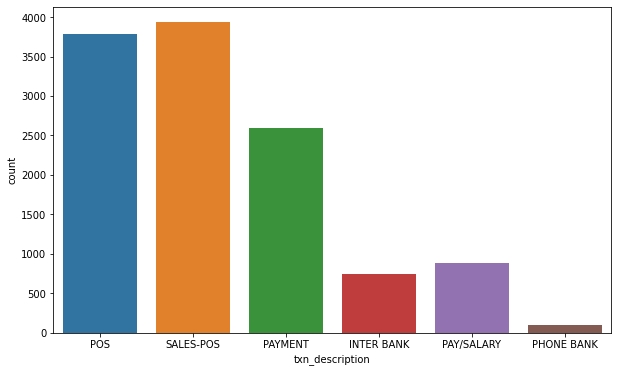

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x="txn_description", data=data)

In [10]:
plot_data= data.groupby(["customer_id"]).mean().reset_index()
plot_data.head()

,customer_id,age,balance,amount
0,CUS-1005756958,53.0,2275.852055,222.862603
1,CUS-1117979751,21.0,9829.929000,339.843700
2,CUS-1140341822,28.0,5699.212250,212.632500
3,CUS-1147642491,34.0,9032.841186,245.600169
4,CUS-1196156254,34.0,22272.433755,147.145796


#Finding out the mean salary of each customer

In [11]:
#Finding out the mean salary of each customer
#Finding the Salary for all the customers
salary=data[data["txn_description"]=="PAY/SALARY"].groupby("customer_id").mean().reset_index()
salary=salary[["customer_id","amount"]]
salary=salary.rename(columns = {'amount':'salary'})

In [12]:
salary.head()

,customer_id,salary
0,CUS-1005756958,970.47
1,CUS-1117979751,3578.65
2,CUS-1140341822,1916.51
3,CUS-1147642491,1711.39
4,CUS-1196156254,3903.73


In [13]:
plot_data=pd.merge(plot_data, salary, on="customer_id")
plot_data.head()

,customer_id,age,balance,amount,salary
0,CUS-1005756958,53.0,2275.852055,222.862603,970.47
1,CUS-1117979751,21.0,9829.929000,339.843700,3578.65
2,CUS-1140341822,28.0,5699.212250,212.632500,1916.51
3,CUS-1147642491,34.0,9032.841186,245.600169,1711.39
4,CUS-1196156254,34.0,22272.433755,147.145796,3903.73


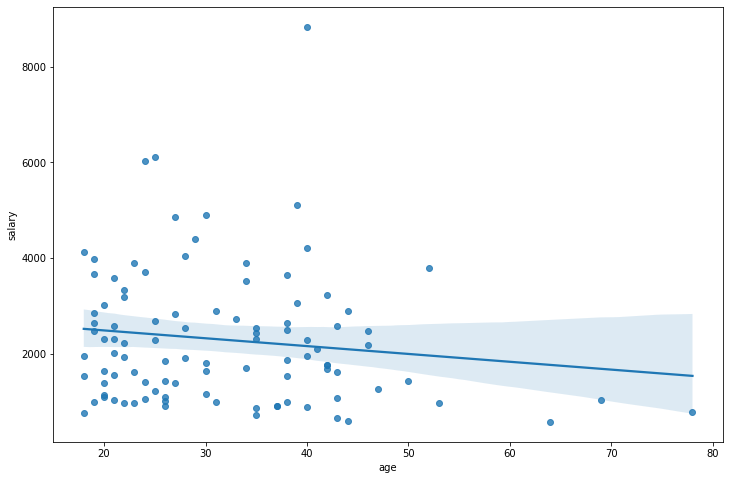

In [14]:
plt.figure(figsize=(12, 8))
sns.regplot(x="age", y="salary", data=plot_data)

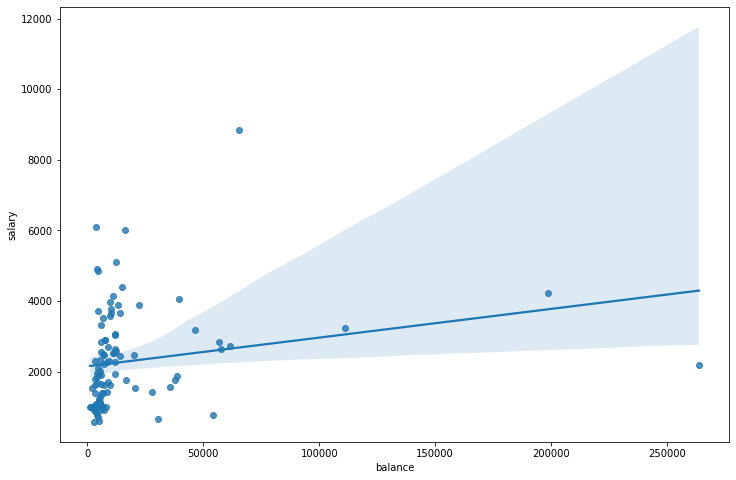

In [15]:
plt.figure(figsize=(12, 8))
sns.regplot(x="balance",y= "salary", fit_reg=True, data=plot_data)

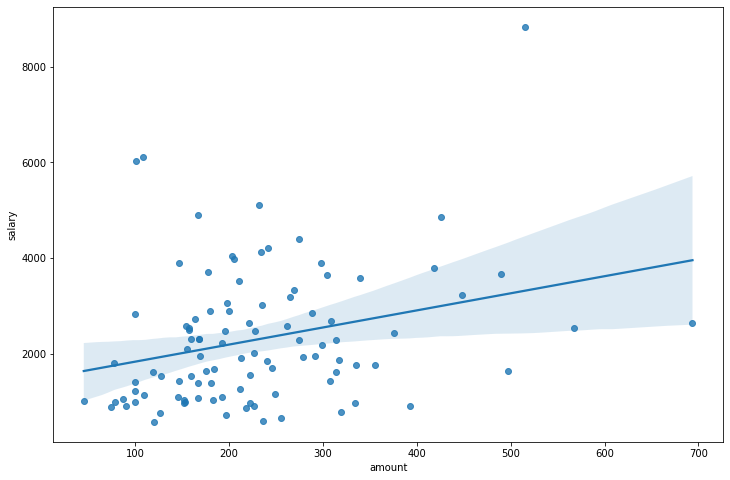

In [16]:
plt.figure(figsize=(12, 8))
sns.regplot(x="amount",y= "salary", fit_reg=True, data=plot_data)

In [17]:
#POS indicates transaction made at any business or such, thus it reflects spending behaviour of customer
pos=data[data["txn_description"]==("POS"or"SALES-POS")].groupby("customer_id").mean().reset_index()
pos=pos[["customer_id","amount"]]
pos=pos.rename(columns = {'amount':'pos'})

In [18]:
pos.head()

,customer_id,pos
0,CUS-1005756958,28.769615
1,CUS-1117979751,23.321923
2,CUS-1140341822,34.781282
3,CUS-1147642491,54.271316
4,CUS-1196156254,31.157432


In [19]:
len(pos)

100

In [20]:
#Bills and payments made by customer
payment=data[data["txn_description"]=="PAYMENT"].groupby("customer_id").mean().reset_index()
payment=payment[["customer_id","amount"]]
payment=payment.rename(columns = {'amount':'payment'})

In [21]:
payment.head()

,customer_id,payment
0,CUS-1005756958,144.000000
1,CUS-1117979751,98.925000
2,CUS-1140341822,142.000000
3,CUS-1147642491,96.185185
4,CUS-1196156254,43.100000


In [22]:
len(payment)

100

In [26]:
#Bills and payments made by customer
interbank=data[data["txn_description"]=="INTER BANK"].groupby("customer_id").mean().reset_index()
interbank=interbank[["customer_id","amount"]]
interbank=interbank.rename(columns = {'amount':'payment'})

In [27]:
interbank.head()

,customer_id,payment
0,CUS-1117979751,1001.0000
1,CUS-1140341822,90.0000
2,CUS-1147642491,125.0000
3,CUS-1196156254,153.4000
4,CUS-1271030853,76.1875


In [28]:
len(interbank)

68

In [29]:
#Banking via phone/online pay
phonebank=data[data["txn_description"]=='PHONE BANK'].groupby("customer_id").mean().reset_index()
phonebank=phonebank[["customer_id","amount"]]
phonebank=phonebank.rename(columns = {'amount':'phonebank'})

In [30]:
phonebank.head()

,customer_id,phonebank
0,CUS-1005756958,182.0
1,CUS-1646183815,150.0
2,CUS-1896554896,1916.0
3,CUS-2155701614,82.0
4,CUS-2348881191,1629.0


In [31]:
len(phonebank)

16

In [32]:
#Combining relevant data into a single data frame
customer=data.groupby("customer_id").mean().reset_index()
customer=customer[["customer_id","age","balance"]]
df=pd.merge(customer, payment, on="customer_id")
df=pd.merge(df, pos, on="customer_id")
df=pd.merge(df, salary, on="customer_id")

In [33]:
df.head()

,customer_id,age,balance,payment,pos,salary
0,CUS-1005756958,53.0,2275.852055,144.000000,28.769615,970.47
1,CUS-1117979751,21.0,9829.929000,98.925000,23.321923,3578.65
2,CUS-1140341822,28.0,5699.212250,142.000000,34.781282,1916.51
3,CUS-1147642491,34.0,9032.841186,96.185185,54.271316,1711.39
4,CUS-1196156254,34.0,22272.433755,43.100000,31.157432,3903.73


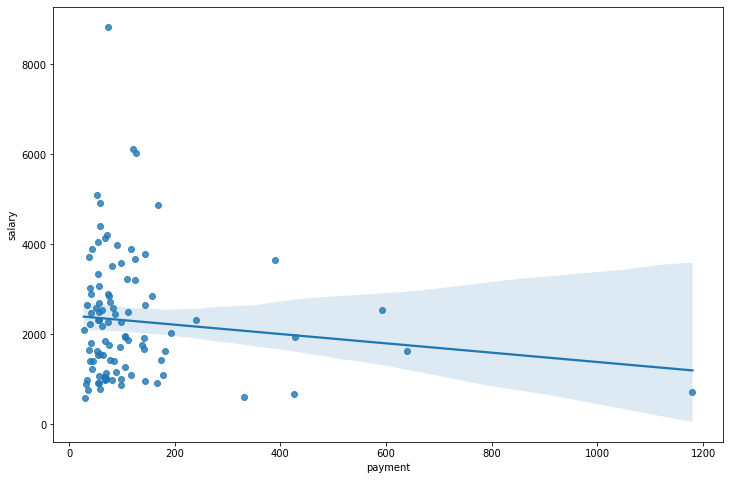

In [34]:
#Relations For New Features
#Salary vs Payments
plt.figure(figsize=(12, 8))
sns.regplot(x="payment",y= "salary", fit_reg=True, data=df)

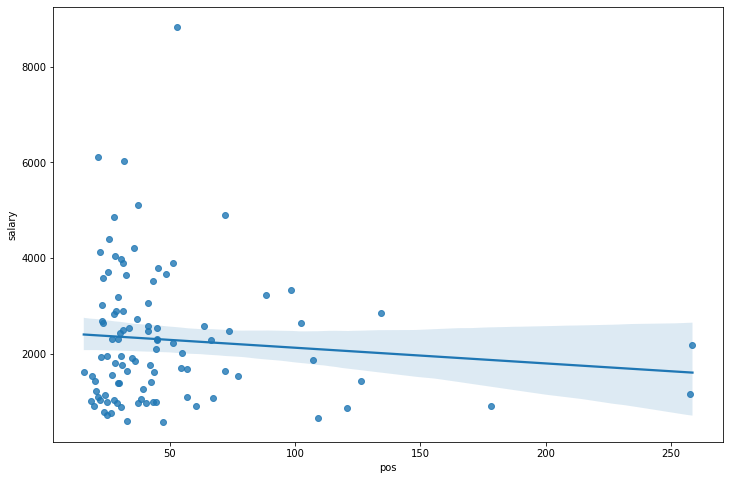

In [35]:
#Salary vs Point Of Sale
plt.figure(figsize=(12, 8))
sns.regplot(x="pos",y= "salary", fit_reg=True, data=df)

#Predicting the Salary:

In [36]:
#Defining the X and y of machine learning
X=df[["age","balance","payment","pos"]].values
y=df["salary"].values

In [37]:
#Train,Test splitting
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [38]:
#Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)
print('Coefficient of determination: ', r2_score(y_test, y_pred))

Coefficient of determination:  0.07666219584715894


In [39]:
#Here we make a sample prediction
#age=50
#balance=5000
#payment=100
#pos=50
#age in years and financial values in Australian Dollar

print("The model predicts salary will be=")
print(lr.predict([[60,5000,100,50]])[0])

The model predicts salary will be=
1467.1295983855507


In [40]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt.predict(X_test)

array([ 917.45, 2639.76, 3517.61, 2572.91, 3071.14, 3649.51, 2840.15,
        917.45, 1757.81, 1272.47,  576.  , 2500.  , 3026.95, 2639.76,
       3676.94, 2718.51, 1099.7 , 3676.94, 2572.91, 3517.61])

In [41]:
#Here we make a sample prediction
#age=50
#balance=5000
#payment=100
#pos=50
#age in years and financial values in Australian Dollar

print("The model predicts salary will be=")
print(dt.predict([[60,5000,100,50]])[0])

The model predicts salary will be=
1002.13
